<a href="https://colab.research.google.com/github/XingxinHE/FinalThesis_DL-GA/blob/master/Stage_3_Coord%26AutomateCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [4]:
os.chdir("/content/gdrive/My Drive/Final Thesis/data")

## Process Coordinate to Floats

In [8]:
dataframe = pd.read_csv('stage3/605sample_3 points_ coordinates.csv', header=None)

In [9]:
dataframe.head()

,0
0,"{40, 35, 0}"
1,"{30, 20, 0}"
2,"{0, 35, 0}"
3,"{40, 40, 0}"
4,"{40, 15, 0}"


In [13]:
dataframe['coord'] = [data[1:-1] for data in dataframe[0]]

In [14]:
dataframe.head()

,0,coord
0,"{40, 35, 0}","40, 35, 0"
1,"{30, 20, 0}","30, 20, 0"
2,"{0, 35, 0}","0, 35, 0"
3,"{40, 40, 0}","40, 40, 0"
4,"{40, 15, 0}","40, 15, 0"


In [15]:
coord = dataframe['coord'].to_numpy()

In [16]:
def f(x):
    return np.array(x.replace('[', '').replace(']', '').replace(',', ' ').split()).astype(float)

result = np.array([f(t) for t in coord])
result

array([[40., 35.,  0.],
       [30., 20.,  0.],
       [ 0., 35.,  0.],
       ...,
       [25., 35.,  0.],
       [25., 10.,  0.],
       [ 0., 30.,  0.]])

In [19]:
result.shape

(1815, 3)

In [23]:
result = result.reshape((605,9))

In [24]:
coord = pd.DataFrame(result)
coord.head()

,0,1,2,3,4,5,6,7,8
0,40.0,35.0,0.0,30.0,20.0,0.0,0.0,35.0,0.0
1,40.0,40.0,0.0,40.0,15.0,0.0,0.0,35.0,0.0
2,30.0,30.0,0.0,40.0,20.0,0.0,0.0,20.0,0.0
3,10.0,40.0,0.0,40.0,20.0,0.0,0.0,25.0,0.0
4,35.0,40.0,0.0,30.0,10.0,0.0,0.0,30.0,0.0


In [25]:
coord.to_csv('605_coord.csv')

## Automate 605 .csv demo

In [70]:
result = pd.read_csv('stage3/results.tsv', sep='\t')
result.head()

,id,generation,parent1,parent2,feasible,[Continuous] Input,[Minimize] Weight
0,0,0,None,None,True,"[1.831689280539433, 3.7655026142248564, 3.1877...",142.123620
1,1,0,None,None,True,"[3.219720963779964, 0.9999956610425843, 3.3249...",140.789556
2,2,0,None,None,True,"[3.283442952631429, 0.7229911685290051, 1.3090...",135.932726
3,3,0,None,None,True,"[2.7651145389400296, 1.5303425066903, 3.012102...",132.514089
4,4,0,None,None,True,"[3.4325253554462516, 0.5199780015998892, 3.920...",146.847933


In [71]:
result = result.iloc[:,-2:]
result.head()

,[Continuous] Input,[Minimize] Weight
0,"[1.831689280539433, 3.7655026142248564, 3.1877...",142.123620
1,"[3.219720963779964, 0.9999956610425843, 3.3249...",140.789556
2,"[3.283442952631429, 0.7229911685290051, 1.3090...",135.932726
3,"[2.7651145389400296, 1.5303425066903, 3.012102...",132.514089
4,"[3.4325253554462516, 0.5199780015998892, 3.920...",146.847933


In [72]:
cols = ['bar_orders','weight']
result.columns = cols
result.head()

,bar_orders,weight
0,"[1.831689280539433, 3.7655026142248564, 3.1877...",142.123620
1,"[3.219720963779964, 0.9999956610425843, 3.3249...",140.789556
2,"[3.283442952631429, 0.7229911685290051, 1.3090...",135.932726
3,"[2.7651145389400296, 1.5303425066903, 3.012102...",132.514089
4,"[3.4325253554462516, 0.5199780015998892, 3.920...",146.847933


In [73]:
result.sort_values(by='weight', ascending=True, inplace=True)
result.head()

,bar_orders,weight
104,"[2.83810870599491, 0.6358100457084843, 1.59191...",103.451705
77,"[2.979163826789143, 0.8307755652158881, 3.5842...",110.059022
107,"[2.945124705162805, 0.6172174407977984, 2.4522...",110.171301
103,"[2.985632311070224, 0.6390428214761108, 2.2533...",110.358291
109,"[2.594508843563778, 0.5535237826643411, 2.3451...",110.414266


In [74]:
result['bar_orders'] = [bar[1:-1] for bar in result['bar_orders']]

In [84]:
result.iloc[0,:]

bar_orders    2.83810870599491, 0.6358100457084843, 1.591918...
weight                                                  103.452
Name: 104, dtype: object

In [86]:
result_temp = result.iloc[:3,:]
result_temp.head()

,bar_orders,weight
104,"2.83810870599491, 0.6358100457084843, 1.591918...",103.451705
77,"2.979163826789143, 0.8307755652158881, 3.58423...",110.059022
107,"2.945124705162805, 0.6172174407977984, 2.45222...",110.171301


In [87]:
result_temp.append(result.iloc[0,:], )
result_temp

,bar_orders,weight
104,"2.83810870599491, 0.6358100457084843, 1.591918...",103.451705
77,"2.979163826789143, 0.8307755652158881, 3.58423...",110.059022
107,"2.945124705162805, 0.6172174407977984, 2.45222...",110.171301


## Convert Float to Int

In [76]:
temp_result = result['bar_orders'].to_numpy()

In [77]:
temp_result = np.array([f(t) for t in temp_result])
temp_result = np.floor(temp_result)
temp_result = temp_result.astype(int)

In [79]:
temp_result[0]

array([[2, 0, 1, ..., 0, 2, 1],
       [2, 0, 3, ..., 0, 2, 2],
       [2, 0, 2, ..., 0, 1, 2],
       ...,
       [2, 1, 3, ..., 2, 2, 2],
       [1, 3, 0, ..., 3, 0, 1],
       [2, 3, 0, ..., 1, 3, 3]])

In [48]:
result = result.iloc[0,-2:]
result

bar_orders    [2.83810870599491, 0.6358100457084843, 1.59191...
weight                                                  103.452
Name: 104, dtype: object

In [ ]:
df = dataframe.copy()
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_dataset.head()

,input,displacement,util,weight
499,"2.604325210950597, 2.7372421934009235, 2.74089...",0.333673,23.0,45.243070
1810,"2.963667627424115, 2.2617551889272938, 2.23960...",0.288117,14.9,38.933524
627,"2.052524744120641, 2.0228908794714, 1.37722230...",0.448530,20.9,39.498809
2446,"2.045378657214938, 3.15205790993308, 1.8977599...",0.338203,14.9,34.454227
899,"2.4912011912793197, 2.3466781088245083, 2.1039...",0.411352,18.9,37.384079


In [ ]:
test_dataset.tail()

,input,displacement,util,weight
2527,"2.247391927609522, 1.5192723552991922, 2.04991...",0.329605,16.6,34.756029
2528,"2.296050088380698, 2.500833511254184, 1.757126...",0.292401,13.4,35.064065
2536,"2.2598959544300703, 1.5141428899267906, 2.0744...",0.330438,14.8,36.279261
2541,"2.191501901370926, 2.2820452424322157, 1.40452...",0.338074,18.7,34.114205
2547,"2.336188323365525, 0.7593737458244898, 1.89063...",0.318629,19.9,38.539278


In [ ]:
train_weight_label = train_dataset.pop('weight')
train_displacement_label = train_dataset.pop('displacement')
train_util_label = train_dataset.pop('util')
test_weight_label = test_dataset.pop('weight')
test_displacement_label = test_dataset.pop('displacement')
test_util_label = test_dataset.pop('util')

In [ ]:
train_dataset.head()

,input
499,"2.604325210950597, 2.7372421934009235, 2.74089..."
1810,"2.963667627424115, 2.2617551889272938, 2.23960..."
627,"2.052524744120641, 2.0228908794714, 1.37722230..."
2446,"2.045378657214938, 3.15205790993308, 1.8977599..."
899,"2.4912011912793197, 2.3466781088245083, 2.1039..."


In [ ]:
test_dataset_type = test_dataset['input'].to_numpy()

In [ ]:
test_dataset_type

array(['3.24871894350943, 2.6302140517194017, 3.0417310044282835, 2.312946009713433, 2.1663887048878725, 0.48479241554145125, 1.9774744736607046, 2.687568290055548, 1.736374338360605, 2.5446377210234115, 3.3587869790223244, 0.9845696191408787, 2.766027578825107, 3.99996, 1.6219507430299998, 2.7106999808490393, 2.166729401400767, 3.723109065147236, 3.5705628642027234, 0.02163946617015025, 1.7033846600827918, 2.946919556348662, 3.99996, 3.974273442116475, 0.3375847995203699, 2.6976844578036485, 2.4453322320083766, 0.24641801637716879, 3.179322984983907, 3.509725615747139, 2.3347742636414113, 3.2752683437786025, 2.5742494751528433, 3.9420052447442173, 1.2683490212565567, 0.5763095568100242, 1.641195335620396, 0.06383082252286698, 2.609926875076695, 3.890872349154728, 2.283415195089905, 0.7565818174690403, 1.8054699265962124, 2.788114517404056, 3.3899485546740644, 1.491830623523878, 1.2459141746533158, 2.419559897702098, 1.0513917013804996, 0.6252389258583824, 2.642620842384845, 2.45103642

In [ ]:
train_dataset_type

array(['2.604325210950597, 2.7372421934009235, 2.740890229824102, 1.7500121444892818, 1.8670121671322755, 2.4109381813210597, 0.3502367531661692, 3.606662914208223, 1.3589454655357627, 1.7161244251996852, 2.1349935545888394, 0.9872841310787602, 2.7103602557015076, 3.2967734690502786, 1.8657268996714027, 3.6416092936377407, 2.3427942264728197, 3.199771314561796, 3.3369172820678044, 2.134703263787479, 0.8976369659005656, 0.7374963827187716, 2.242487906133451, 2.908931366863452, 0.39963876874735127, 2.204357905176985, 1.6050140111579618, 2.6104132070834667, 2.1689588873074817, 3.661136930839353, 2.7820598268515777, 3.267246858917503, 3.907045762567142, 2.434401831886441, 2.186443862010812, 1.2583408613961167, 2.837715226265038, 0.03778107512386254, 2.543952094276085, 2.462178394912609, 3.4580535393627425, 0.36054873822726646, 1.3055584268344853, 3.31194771551591, 2.035078111773541, 1.27253909469387, 1.8600398807294856, 1.694819325621953, 2.5748391199797247, 0.208393647107946, 1.2804060646

In [ ]:
type(test_dataset_type)

numpy.ndarray

In [ ]:
test_dataset_type.shape

(420,)

In [ ]:
result

array([[2.60432521, 2.73724219, 2.74089023, ..., 1.96056506, 2.16953011,
        1.85646291],
       [2.96366763, 2.26175519, 2.23960958, ..., 1.92037106, 1.42343186,
        0.35512629],
       [2.05252474, 2.02289088, 1.37722231, ..., 0.64898326, 0.72247909,
        1.80059101],
       ...,
       [1.72964495, 2.53094884, 2.20153176, ..., 1.72296843, 2.26199535,
        1.30271988],
       [3.03908959, 2.89131451, 0.41556585, ..., 2.36425881, 2.21285961,
        1.69408555],
       [1.95672783, 2.4720157 , 2.28667776, ..., 1.46288443, 1.49712734,
        1.47124958]])

In [ ]:
result.shape

(1679, 220)

In [ ]:
train_dataset_type = result

In [ ]:
train_dataset_type

array([[2.60432521, 2.73724219, 2.74089023, ..., 1.96056506, 2.16953011,
        1.85646291],
       [2.96366763, 2.26175519, 2.23960958, ..., 1.92037106, 1.42343186,
        0.35512629],
       [2.05252474, 2.02289088, 1.37722231, ..., 0.64898326, 0.72247909,
        1.80059101],
       ...,
       [1.72964495, 2.53094884, 2.20153176, ..., 1.72296843, 2.26199535,
        1.30271988],
       [3.03908959, 2.89131451, 0.41556585, ..., 2.36425881, 2.21285961,
        1.69408555],
       [1.95672783, 2.4720157 , 2.28667776, ..., 1.46288443, 1.49712734,
        1.47124958]])

In [ ]:
result1 = np.array([f(t) for t in test_dataset_type])
test_dataset_type = result1
test_dataset_type

array([[3.24871894, 2.63021405, 3.041731  , ..., 1.56027316, 3.10618365,
        1.12398219],
       [1.20861695, 1.28282192, 3.76695266, ..., 1.10955616, 2.41551632,
        2.5447154 ],
       [3.99996   , 1.66460907, 3.94943562, ..., 1.62861873, 1.89304024,
        1.63279068],
       ...,
       [2.25989595, 1.51414289, 2.07446683, ..., 2.09989574, 1.37329075,
        1.11567726],
       [2.1915019 , 2.28204524, 1.40452487, ..., 1.58799033, 2.00222748,
        1.11658521],
       [2.33618832, 0.75937375, 1.89063402, ..., 3.21751342, 1.46376394,
        1.33857206]])

In [ ]:
test_dataset_type = np.floor(test_dataset_type)
test_dataset_type = test_dataset_type.astype(int)
test_dataset_type

array([[3, 2, 3, ..., 1, 3, 1],
       [1, 1, 3, ..., 1, 2, 2],
       [3, 1, 3, ..., 1, 1, 1],
       ...,
       [2, 1, 2, ..., 2, 1, 1],
       [2, 2, 1, ..., 1, 2, 1],
       [2, 0, 1, ..., 3, 1, 1]])

In [ ]:
train_dataset_type = np.floor(train_dataset_type)
train_dataset_type = train_dataset_type.astype(int)
train_dataset_type

array([[2, 2, 2, ..., 1, 2, 1],
       [2, 2, 2, ..., 1, 1, 0],
       [2, 2, 1, ..., 0, 0, 1],
       ...,
       [1, 2, 2, ..., 1, 2, 1],
       [3, 2, 0, ..., 2, 2, 1],
       [1, 2, 2, ..., 1, 1, 1]])

In [ ]:
type_input = keras.Input(
    shape=(None,), name="type"
)  # Variable-length sequence of ints

type_features = layers.Embedding(4, 256)(type_input)
type_features = layers.LSTM(128)(type_features)

displacement_pred = layers.Dense(1, name="displacement")(type_features)
weight_pred = layers.Dense(1, name="weight")(type_features)
util_pred = layers.Dense(1, name="util")(type_features)

### Iniitiane model

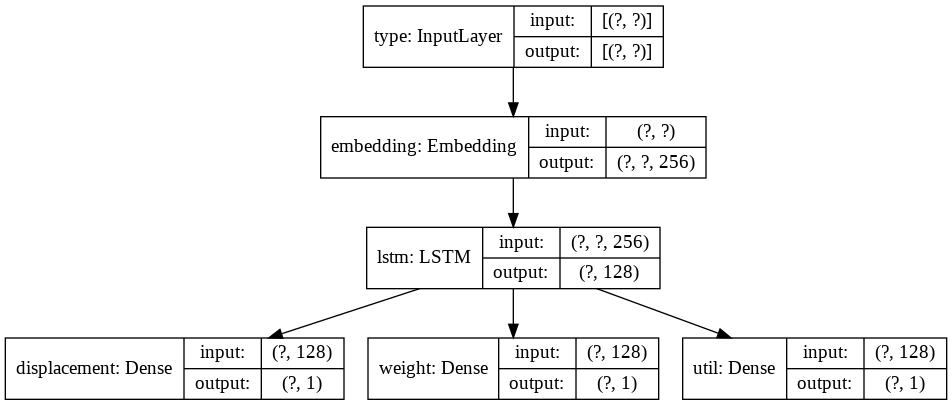

In [ ]:
model = keras.Model(
    inputs = type_input,
    outputs = [displacement_pred, weight_pred, util_pred]
)

keras.utils.plot_model(model, "type_sequences.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "displacement": "mse",
        "weight": "mse",
        "util":"mse"
    },
    loss_weights=[0.1, 1, 2],
)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(
    {"type": train_dataset_type},
    {"displacement": train_displacement_label, "weight": train_weight_label, "util":train_util_label},
    epochs=2000,
    batch_size=32,
    validation_split = 0.2, 
    verbose=0,
    callbacks=[early_stop, tfdocs.modeling.EpochDots()]
)


Epoch: 0, displacement_loss:0.0168,  loss:1066.4413,  util_loss:116.3615,  val_displacement_loss:0.0069,  val_loss:671.5314,  val_util_loss:49.9871,  val_weight_loss:571.5565,  weight_loss:833.7166,  
...............................................................................................

In [ ]:
test_predictions = model.predict({"type": test_dataset_type})
displacement_pred = test_predictions[0]
weight_pred = test_predictions[1]
util_pred = test_predictions[2]

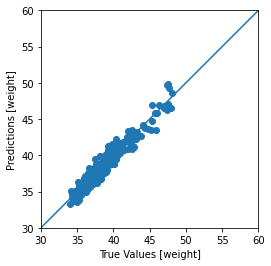

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(weight_pred, test_weight_label)
plt.xlabel('True Values [weight]')
plt.ylabel('Predictions [weight]')
lims = [30, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_weight_label

141     49.664072
178     46.876165
180     46.752680
188     49.893984
207     46.951447
          ...    
2527    34.756029
2528    35.064065
2536    36.279261
2541    34.114205
2547    38.539278
Name: weight, Length: 420, dtype: float64

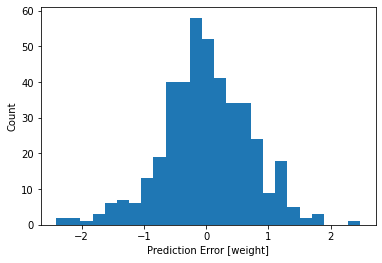

In [ ]:
error = weight_pred.flatten() - test_weight_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [weight]")
_ = plt.ylabel("Count")

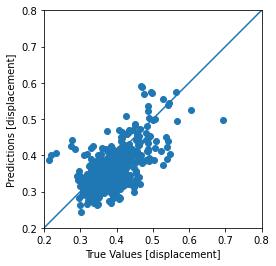

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(displacement_pred, test_displacement_label)
plt.xlabel('True Values [displacement]')
plt.ylabel('Predictions [displacement]')
lims = [0.2, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

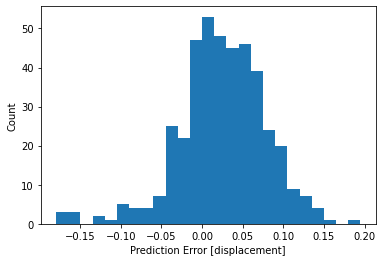

In [ ]:
error = displacement_pred.flatten() - test_displacement_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [displacement]")
_ = plt.ylabel("Count")

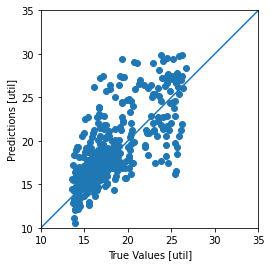

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(util_pred, test_util_label)
plt.xlabel('True Values [util]')
plt.ylabel('Predictions [util]')
lims = [10, 35]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

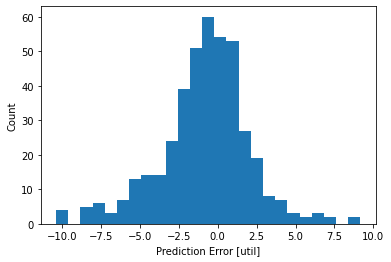

In [ ]:
error = util_pred.flatten() - test_util_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [util]")
_ = plt.ylabel("Count")